# KFall Multi-Class-Dataset-Classification

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
import time
from scipy import signal
import sklearn.metrics
from sklearn.metrics import confusion_matrix
import seaborn as sb

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
cd /gdrive/My\Drive/KFall

/gdrive/MyDrive/KFall


#Loading and Preprocessing the Data

In [4]:
#Defining range of subjects and fall tasks and trialas
subjects = np.arange(6,39)
tasks = np.arange(20,35)
trials = np.arange(1,6)
#ls=50

In [5]:
# Loading Falling activities
# Divinding them to train test & validation sets 
#in a way to make sure that we have all subjects and all activities are included in in all three sets
xtrain2 = []
ytrain2 = []
ztrain2 =[]

xtest2 = []
ytest2 = []
ztest2 = []

xval2 = []
yval2 = []
zval2 = []

ws = 50 #window size
st = 5 #Stepsize

lenght =[]

for i in subjects:
    
    print('Hello subject ',i,end=' !, ')
    for j in tasks:
        
        xx = []# signals
        yy = []# label
        zz = []# activity Id
        try:
            
            for k in trials:
                try:

                    filename = 'S'+ str(i).zfill(2) + 'T' + str(j).zfill(2) + 'R' + str(k).zfill(2) + '.csv'
                    #zfill(2)inghadr sefr ezafe mikone ta size berese be 2
                    labelfilename =  'SA'+ str(i).zfill(2) + '_label.xlsx'

                    label = pd.read_excel('label_data/'+labelfilename,index_col=None, header=None)[1:]
                    data = pd.read_csv('sensor_data/'+'SA' + str(i).zfill(2)+'/'+filename)
                    #print(len(lable))

                    acc_x = np.array(data['AccX']).reshape((len(data),1))
                    acc_y = np.array(data['AccY']).reshape((len(data),1))
                    acc_z = np.array(data['AccZ']).reshape((len(data),1))
                    gyro_x = np.array(data['GyrX']).reshape((len(data),1))
                    gyro_y = np.array(data['GyrY']).reshape((len(data),1))
                    gyro_z = np.array(data['GyrZ']).reshape((len(data),1))
                    euler_x = np.array(data['EulerX']).reshape((len(data),1))
                    euler_y = np.array(data['EulerX']).reshape((len(data),1))
                    euler_z = np.array(data['EulerX']).reshape((len(data),1))
                    
                    ############


                    data = np.concatenate([acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,euler_x,euler_y,euler_z],axis = -1)
                    lenght.append(data.shape[0])

                    activity = 0
                    for row in range(len(label)):
                        trial = int(label.iloc[row][2])
                            #trial = int(z)
                        if not pd.isnull(label.iloc[row][0]):
                            #activity ro khoondim
                            activity = int(label.iloc[row][0][5:7])
                        pf = label.iloc[row][3]-1 #prefall point
                        f = label.iloc[row][4]-1#fall point
                        #inja 50 taye vasat ro gereftim
                        if f - pf < 50 : continue

                        if trial == k and activity == j :
                            start = int(pf-ws+3)
                            #end = pf + ws
                            end = int(pf+((f - pf) - 50 )/2)
                            for x in range(start,end,st):
                                xx.append(data[x:x+ws])
                                if j in [20,23,25,28,30,31,32]:
                                    
                                    yy.append(1)#Forward-Fall
                                if j in [21,27,29,34]:
                                    yy.append(2)#Backward-Fall
                                if j in [22,24,26,33]:
                                    yy.append(3)#Laterall-Fall
                                
                                    
                                zz.append(j)
                            

                except : continue
            
            xtrain,xtest,ytrain,ytest,ztrain,ztest = train_test_split(xx,yy,zz,train_size = 0.7)
            xtest,xval,ytest,yval,ztest,zval = train_test_split(xtest,ytest,ztest,train_size = 0.5) 

            xtrain2 += xtrain
            ytrain2 += ytrain
            ztrain2 +=ztrain

            xtest2 += xtest
            ytest2 += ytest
            ztest2 += ztest

            xval2 += xval
            yval2 += yval
            zval2 += zval
        except : continue
        
    
    
    
print(len(lenght))

Hello subject  6 !, Hello subject  7 !, Hello subject  8 !, Hello subject  9 !, Hello subject  10 !, Hello subject  11 !, Hello subject  12 !, Hello subject  13 !, Hello subject  14 !, Hello subject  15 !, Hello subject  16 !, Hello subject  17 !, Hello subject  18 !, Hello subject  19 !, Hello subject  20 !, Hello subject  21 !, Hello subject  22 !, Hello subject  23 !, Hello subject  24 !, Hello subject  25 !, Hello subject  26 !, Hello subject  27 !, Hello subject  28 !, Hello subject  29 !, Hello subject  30 !, Hello subject  31 !, Hello subject  32 !, Hello subject  33 !, Hello subject  34 !, Hello subject  35 !, Hello subject  36 !, Hello subject  37 !, Hello subject  38 !, 2319


In [6]:
t1=np.array(xtrain2)
t2=np.array(ytrain2)
t3=np.array(ztrain2)

In [7]:
print(t1.shape)
print(t2.shape)
print(t3.shape)

(18711, 50, 9)
(18711,)
(18711,)


In [8]:
# Loading ADLs  and doing the same steps as Falling ones an adding them to faaling ones
st =5
lenght2=[]
for i in subjects:
    
    print('Goodbye subject ',i,end=' !, ')
    for j in np.arange(1,40):
        if j in tasks : continue
        try:
        
            xx = []
            yy = []
            zz = []

            for k in trials:
                try :
                    filename = 'S'+ str(i).zfill(2) + 'T' + str(j).zfill(2) + 'R' + str(k).zfill(2) + '.csv'

                    data = pd.read_csv('sensor_data/'+'SA' + str(i).zfill(2)+'/'+filename)

                    acc_x = np.array(data['AccX']).reshape((len(data),1))
                    acc_y = np.array(data['AccY']).reshape((len(data),1))
                    acc_z = np.array(data['AccZ']).reshape((len(data),1))
                    gyro_x = np.array(data['GyrX']).reshape((len(data),1))
                    gyro_y = np.array(data['GyrY']).reshape((len(data),1))
                    gyro_z = np.array(data['GyrZ']).reshape((len(data),1))
                    euler_x = np.array(data['EulerX']).reshape((len(data),1))
                    euler_y = np.array(data['EulerX']).reshape((len(data),1))
                    euler_z = np.array(data['EulerX']).reshape((len(data),1))

                    data = np.concatenate([acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,euler_x,euler_y,euler_z],axis = -1)
                    lenght2.append(data.shape[0])

                    cnt = 0
                    if data.shape[0] < 100 : continue

                    if j in [1,11,12,17] :
                        for x in range(50,data.shape[0]-50,st):
                            xx.append(data[x:x+50])
                            yy.append(0)
                            zz.append(j)
                            cnt += 1
                            if cnt == 50:break
                    else : 
                        for x in range(50,data.shape[0]-50,st):
                            xx.append(data[x:x+50])
                            yy.append(0)
                            zz.append(j)
                            cnt += 1
                            if cnt == 10:break

                except : continue


            xtrain,xtest,ytrain,ytest,ztrain,ztest = train_test_split(xx,yy,zz,train_size = 0.7)
            xtest,xval,ytest,yval,ztest,zval = train_test_split(xtest,ytest,ztest,train_size = 0.5) 
            

            xtrain2 += xtrain
            ytrain2 += ytrain
            ztrain2 += ztrain

            xtest2 += xtest
            ytest2 += ytest
            ztest2 += ztest

            xval2 += xval
            yval2 += yval
            zval2 += zval
        except : continue
        
    

xtrain2 = np.array(xtrain2)
ytrain2 = np.array(ytrain2)
ztrain2 = np.array(ztrain2)

xtest2 = np.array(xtest2)
ytest2 = np.array(ytest2)
ztest2 = np.array(ztest2)

xval2 = np.array(xval2)
yval2 = np.array(yval2)
zval2 = np.array(zval2)
print(min(lenght2),max(lenght2),sum(lenght2)/len(lenght2))

Goodbye subject  6 !, Goodbye subject  7 !, Goodbye subject  8 !, Goodbye subject  9 !, Goodbye subject  10 !, Goodbye subject  11 !, Goodbye subject  12 !, Goodbye subject  13 !, Goodbye subject  14 !, Goodbye subject  15 !, Goodbye subject  16 !, Goodbye subject  17 !, Goodbye subject  18 !, Goodbye subject  19 !, Goodbye subject  20 !, Goodbye subject  21 !, Goodbye subject  22 !, Goodbye subject  23 !, Goodbye subject  24 !, Goodbye subject  25 !, Goodbye subject  26 !, Goodbye subject  27 !, Goodbye subject  28 !, Goodbye subject  29 !, Goodbye subject  30 !, Goodbye subject  31 !, Goodbye subject  32 !, Goodbye subject  33 !, Goodbye subject  34 !, Goodbye subject  35 !, Goodbye subject  36 !, Goodbye subject  37 !, Goodbye subject  38 !, 204 4087 832.6665439823335


In [9]:
xtrain2.shape,ytrain2.shape, ztrain2.shape

((41314, 50, 9), (41314,), (41314,))

In [10]:
# one-hot
ytrain1 = []
for i in ytrain2:
    ytrain1.append([0]*4)
    ytrain1[-1][i] = 1
ytrain2 = np.array(ytrain1)
#####

ytest1 = []
for i in ytest2:
    ytest1.append([0]*4)
    ytest1[-1][i] = 1
ytest2 = np.array(ytest1)

#####
yval1 = []
for i in yval2:
    yval1.append([0]*4)
    yval1[-1][i] = 1
yval2 = np.array(yval1)

In [11]:
xtrain2.shape,ytrain2.shape,xtest2.shape,ytest2.shape,xval2.shape,yval2.shape

((41314, 50, 9),
 (41314, 4),
 (8594, 50, 9),
 (8594, 4),
 (9420, 50, 9),
 (9420, 4))

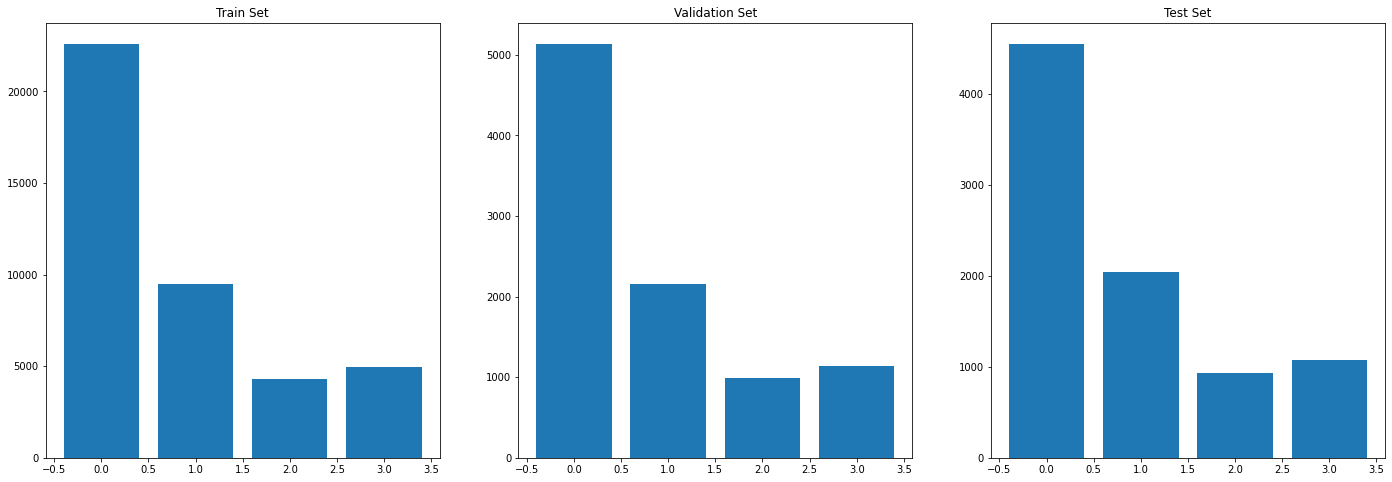

In [12]:
plt.figure(figsize = (24,8))
plt.subplot(1,3,1)
plt.title("Train Set")
plt.bar(np.arange(0,4),sum(ytrain2))

plt.subplot(1,3,2)
plt.title("Validation Set")
plt.bar(np.arange(0,4),sum(yval2))

plt.subplot(1,3,3)
plt.title("Test Set")
plt.bar(np.arange(0,4),sum(ytest2))
plt.show()

# CNN

In [13]:
def model1_cnn(input_shape,number_of_activities,seq=0):
    input_layer = keras.Input(shape = input_shape,name = 'title_'+str(seq))
    
    cnn = layers.Conv1D(36,5,1,"same", name ='Conv1D_1')(input_layer)
    cnn = layers.Conv1D(72,5,1,"same",name = 'Conv1D_2')(cnn)
    cnn = layers.LayerNormalization(name = 'layernorm_1')(cnn)
    cnn = layers.MaxPool1D(2)(cnn)#
    cnn = layers.Dropout(rate = 0.2)(cnn)#
    
    cnn = layers.Flatten()(cnn)
    
    cnn = layers.Dense(72,activation='relu',name = 'dense_1')(cnn)
    cnn = layers.Dense(36,activation='relu',name = 'dense_2')(cnn)
    cnn = layers.Dense(number_of_activities,activation='softmax',name = 'dense_4')(cnn)
    
    return keras.Model(input_layer,cnn,name = 'model')

In [14]:
cnn1 = model1_cnn(xtrain2.shape[1:],4)

In [15]:
cnn1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 title_0 (InputLayer)        [(None, 50, 9)]           0         
                                                                 
 Conv1D_1 (Conv1D)           (None, 50, 36)            1656      
                                                                 
 Conv1D_2 (Conv1D)           (None, 50, 72)            13032     
                                                                 
 layernorm_1 (LayerNormaliza  (None, 50, 72)           144       
 tion)                                                           
                                                                 
 max_pooling1d (MaxPooling1D  (None, 25, 72)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 72)            0     

In [16]:
# Training 
optimizers = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn1.compile(loss = 'categorical_crossentropy',optimizer=optimizers,metrics=['accuracy'])
cnn_history = cnn1.fit(
    xtrain2,
    ytrain2,
    validation_data = (
        xval2,
        yval2
    ),
    epochs = 30,
    batch_size = 100,
)


Epoch 1/30
414/414 [==============================] - 14s 9ms/step - loss: 0.6603 - accuracy: 0.7402 - val_loss: 0.5741 - val_accuracy: 0.7724
Epoch 2/30
414/414 [==============================] - 3s 6ms/step - loss: 0.5174 - accuracy: 0.7946 - val_loss: 0.4628 - val_accuracy: 0.8215
Epoch 3/30
414/414 [==============================] - 3s 6ms/step - loss: 0.4498 - accuracy: 0.8248 - val_loss: 0.4725 - val_accuracy: 0.8230
Epoch 4/30
414/414 [==============================] - 2s 6ms/step - loss: 0.3955 - accuracy: 0.8504 - val_loss: 0.4124 - val_accuracy: 0.8487
Epoch 5/30
414/414 [==============================] - 2s 6ms/step - loss: 0.3641 - accuracy: 0.8612 - val_loss: 0.3457 - val_accuracy: 0.8697
Epoch 6/30
414/414 [==============================] - 3s 8ms/step - loss: 0.3383 - accuracy: 0.8717 - val_loss: 0.3212 - val_accuracy: 0.8761
Epoch 7/30
414/414 [==============================] - 3s 6ms/step - loss: 0.3112 - accuracy: 0.8846 - val_loss: 0.3164 - val_accuracy: 0.8834
Epoch

In [17]:
ypred = cnn1.predict(xtest2)
ytemp = []
for i in ypred:
    pred = [0]*4
    pred[np.argmax(i)] = 1
    ytemp.append(pred)
ypred = np.array(ytemp)

269/269 [==============================] - 1s 2ms/step


In [18]:
cnt = 0
for i in range(len(ypred)):
    if (ypred[i] == ytest2[i]).all() : cnt += 1
        
print('test accuracy = ',cnt / len(ypred) * 100)

test accuracy =  92.68094019083081


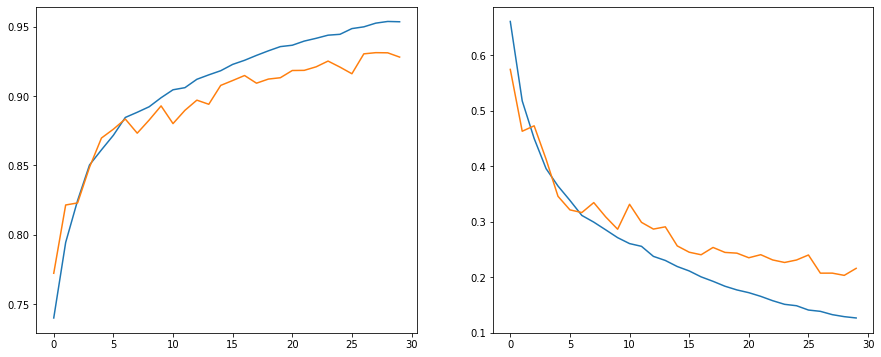

In [19]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.subplot(1,2,2)
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.show()

In [20]:
test_cm = confusion_matrix(ytest2.argmax(axis = 1),ypred.argmax(axis = 1))

In [21]:
accuracy_per_class = np.diag(test_cm) / np.sum(test_cm, axis=1)

print("Accuracy per class:", accuracy_per_class)

Accuracy per class: [0.95866315 0.87684004 0.92158969 0.8913649 ]


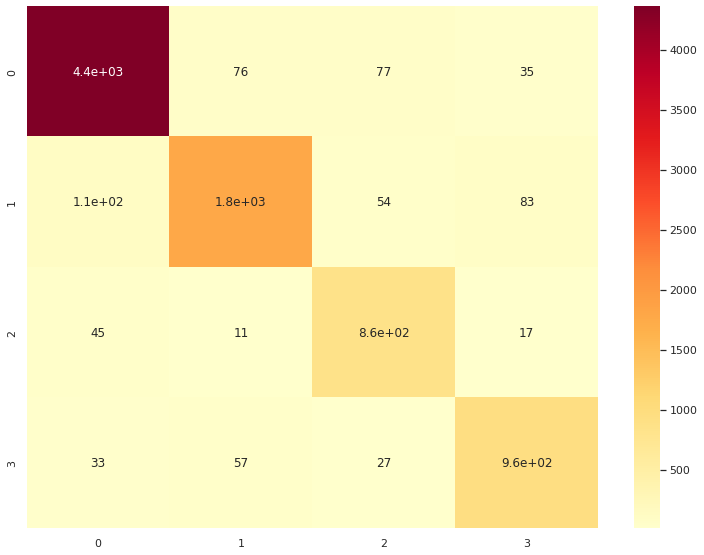

In [22]:
sb.set(rc = {'figure.figsize':(12.8,9.6)})
sb.heatmap(test_cm,annot = True, cmap = 'YlOrRd')

In [23]:
print(sklearn.metrics.classification_report(ytest2.argmax(axis = 1),ypred.argmax(axis = 1)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4548
           1       0.93      0.88      0.90      2038
           2       0.84      0.92      0.88       931
           3       0.88      0.89      0.88      1077

    accuracy                           0.93      8594
   macro avg       0.90      0.91      0.91      8594
weighted avg       0.93      0.93      0.93      8594



In [24]:
cnt = np.zeros(len(tasks))
cnt_t = np.zeros(len(tasks))

for i in range (len(ypred)):
    for j in range(len(tasks)):
        if ztest2[i]==tasks[j]:
            cnt_t[j] += 1
            if (ypred[i] == ytest2[i]).all():
                cnt[j] +=1

for j in range(len(tasks)):
    c = cnt[j]/cnt_t[j]*100
    print("for task " + str(tasks[j]) + " the accuracy is: " + str(c))
            
     

for task 20 the accuracy is: 91.50326797385621
for task 21 the accuracy is: 77.29729729729729
for task 22 the accuracy is: 88.47583643122677
for task 23 the accuracy is: 89.86928104575163
for task 24 the accuracy is: 93.20754716981132
for task 25 the accuracy is: 92.7927927927928
for task 26 the accuracy is: 90.87837837837837
for task 27 the accuracy is: 99.57805907172997
for task 28 the accuracy is: 86.3013698630137
for task 29 the accuracy is: 93.86973180076629
for task 30 the accuracy is: 83.63636363636363
for task 31 the accuracy is: 85.21400778210116
for task 32 the accuracy is: 82.5278810408922
for task 33 the accuracy is: 83.40080971659918
for task 34 the accuracy is: 94.35483870967742


# LSTM

In [72]:
#Best Modeltill now for multiclass
#LSTM-2
def build_lstm2(input_shape,number_of_activities):
    input_layer = keras.Input(shape = input_shape,name = 'title_')
    
    lstm = layers.LSTM(36,return_sequences = True,name = 'lstm_0')(input_layer)
    lstm = layers.LayerNormalization()(lstm)
    lstm = layers.Dropout(rate = 0.2)(lstm)

    lstm = layers.LSTM(72,return_sequences = True,name = 'lstm_1')(lstm)
    lstm = layers.LayerNormalization()(lstm)
    
    lstm = layers.LSTM(144,return_sequences = True,name = 'lstm_2')(lstm)
    lstm = layers.LayerNormalization()(lstm)
    lstm = layers.Dropout(rate = 0.2)(lstm)

    lstm = layers.LSTM(288,return_sequences = True,name = 'lstm_3')(lstm)
    lstm = layers.LayerNormalization()(lstm)

    lstm = layers.LSTM(288,name = 'lstm_4')(lstm)
    lstm = layers.LayerNormalization()(lstm)
    #lstm = layers.Dropout(rate = 0.2)(lstm)

    lstm = layers.Dense(144,name = 'dense_1')(lstm)
    lstm = layers.Dense(24,name = 'dense_2')(lstm)
    lstm = layers.Dense(72,name = 'dense_3')(lstm)
    lstm = layers.Dense(number_of_activities,name = 'dense_4',activation = 'softmax')(lstm)
    
    return keras.Model(input_layer,lstm)

In [73]:
lstm2 = build_lstm2(xtrain2.shape[1:],4)

In [74]:
lstm2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 title_ (InputLayer)         [(None, 50, 9)]           0         
                                                                 
 lstm_0 (LSTM)               (None, 50, 36)            6624      
                                                                 
 layer_normalization_14 (Lay  (None, 50, 36)           72        
 erNormalization)                                                
                                                                 
 dropout_8 (Dropout)         (None, 50, 36)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 72)            31392     
                                                                 
 layer_normalization_15 (Lay  (None, 50, 72)           144       
 erNormalization)                                          

In [75]:
lstm2.compile(loss = 'categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
lstm_history = lstm2.fit(
    xtrain2,
    ytrain2,
    validation_data = (
        xval2,
        yval2
    ),
    epochs = 20,
    batch_size = 100,
)

Epoch 1/20
414/414 [==============================] - 28s 39ms/step - loss: 0.6113 - accuracy: 0.7643 - val_loss: 0.5385 - val_accuracy: 0.7874
Epoch 2/20
414/414 [==============================] - 14s 34ms/step - loss: 0.4623 - accuracy: 0.8219 - val_loss: 0.4442 - val_accuracy: 0.8349
Epoch 3/20
414/414 [==============================] - 14s 34ms/step - loss: 0.4074 - accuracy: 0.8468 - val_loss: 0.3814 - val_accuracy: 0.8554
Epoch 4/20
414/414 [==============================] - 14s 34ms/step - loss: 0.3705 - accuracy: 0.8584 - val_loss: 0.3418 - val_accuracy: 0.8749
Epoch 5/20
414/414 [==============================] - 14s 34ms/step - loss: 0.3408 - accuracy: 0.8732 - val_loss: 0.3554 - val_accuracy: 0.8682
Epoch 6/20
414/414 [==============================] - 14s 34ms/step - loss: 0.3300 - accuracy: 0.8784 - val_loss: 0.3249 - val_accuracy: 0.8815
Epoch 7/20
414/414 [==============================] - 14s 34ms/step - loss: 0.3055 - accuracy: 0.8858 - val_loss: 0.2963 - val_accuracy:

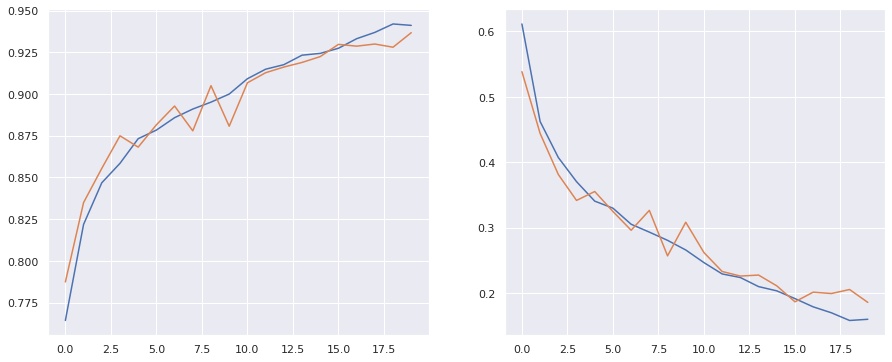

In [76]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.subplot(1,2,2)
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.show()

In [77]:
ypred = lstm2.predict(xtest2)
ytemp = []
for i in ypred:
    pred = [0]*4
    pred[np.argmax(i)] = 1
    ytemp.append(pred)
ypred = np.array(ytemp)

269/269 [==============================] - 4s 8ms/step


In [78]:
# Testing accuracy

cnt = 0
for i in range(len(ypred)):
    if (ypred[i] == ytest2[i]).all() : cnt += 1
        
print('test accuracy = ',cnt / len(ypred) * 100)

test accuracy =  93.15801722131721


In [79]:
test_cm = confusion_matrix(ytest2.argmax(axis = 1),ypred.argmax(axis = 1))

In [80]:
accuracy_per_class = np.diag(test_cm) / np.sum(test_cm, axis=1)

print("Accuracy per class:", accuracy_per_class)

Accuracy per class: [0.97097625 0.89254171 0.87862513 0.88486537]


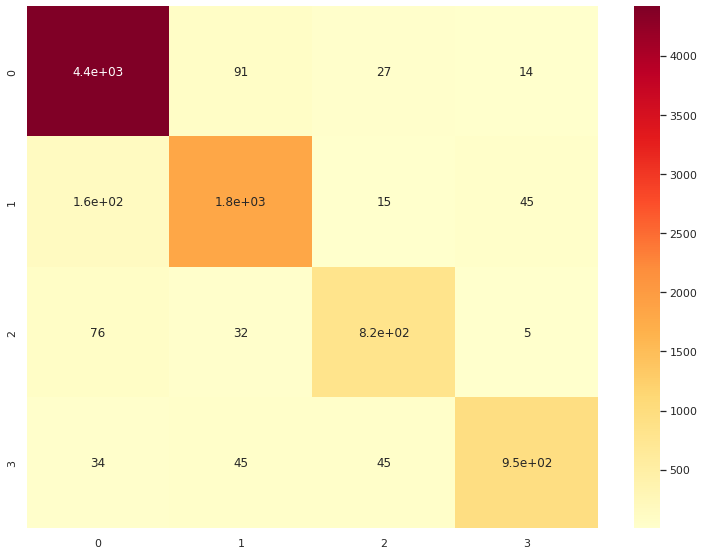

In [81]:
sb.set(rc = {'figure.figsize':(12.8,9.6)})
sb.heatmap(test_cm,annot = True, cmap = 'YlOrRd')

In [82]:
print(sklearn.metrics.classification_report(ytest2.argmax(axis = 1),ypred.argmax(axis = 1)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      4548
           1       0.92      0.89      0.90      2038
           2       0.90      0.88      0.89       931
           3       0.94      0.88      0.91      1077

    accuracy                           0.93      8594
   macro avg       0.92      0.91      0.92      8594
weighted avg       0.93      0.93      0.93      8594



In [83]:
cnt = np.zeros(len(tasks))
cnt_t = np.zeros(len(tasks))

for i in range (len(ypred)):
    for j in range(len(tasks)):
        if ztest2[i]==tasks[j]:
            cnt_t[j] += 1
            if (ypred[i] == ytest2[i]).all():
                cnt[j] +=1

for j in range(len(tasks)):
    c = cnt[j]/cnt_t[j]*100
    print("for task " + str(tasks[j]) + " the accuracy is: " + str(c))
            

for task 20 the accuracy is: 93.79084967320262
for task 21 the accuracy is: 67.02702702702703
for task 22 the accuracy is: 89.96282527881041
for task 23 the accuracy is: 95.09803921568627
for task 24 the accuracy is: 87.54716981132076
for task 25 the accuracy is: 81.38138138138137
for task 26 the accuracy is: 89.86486486486487
for task 27 the accuracy is: 97.46835443037975
for task 28 the accuracy is: 82.53424657534246
for task 29 the accuracy is: 91.95402298850574
for task 30 the accuracy is: 88.36363636363636
for task 31 the accuracy is: 94.16342412451361
for task 32 the accuracy is: 90.70631970260223
for task 33 the accuracy is: 86.23481781376519
for task 34 the accuracy is: 89.91935483870968


# CNN + LSTM

In [84]:
def build_conv_lstm(input_shape,number_of_activities):
    input_layer = keras.Input(shape = input_shape)
    
    cnn = layers.Conv1D(36,2,1,"same",name = 'Conv1D_1')(input_layer)
    cnn = layers.LayerNormalization(name = 'layernorm_1')(cnn)
    cnn = layers.Dropout(rate = 0.1)(cnn)
    
    cnn = layers.Conv1D(144,2,1,"same",name = 'Conv1D_2')(cnn)
    cnn = layers.LayerNormalization(name = 'layernorm_2')(cnn)
    cnn = layers.MaxPool1D(2)(cnn)

    cnn = layers.Conv1D(288,2,1,"same",name = 'Conv1D_3')(cnn)
    cnn = layers.LayerNormalization(name = 'layernorm_3')(cnn)
    cnn = layers.MaxPool1D(2)(cnn)
    cnn = layers.Dropout(rate = 0.1)(cnn)
    
    cnn = layers.Conv1D(512,2,1,"same",name = 'Conv1D_4')(cnn)
    cnn = layers.LayerNormalization(name = 'layernorm_4')(cnn)
    cnn = layers.MaxPool1D(2)(cnn)
    
    cnn = layers.Conv1D(288,2,1,"same",name = 'Conv1D_5')(cnn)
    cnn = layers.LayerNormalization(name = 'layernorm_5')(cnn)
    cnn = layers.MaxPool1D(2)(cnn)
    cnn = layers.Dropout(rate = 0.1)(cnn)
    
    cnn = layers.Conv1D(144,2,1,"same",name = 'Conv1D_6')(cnn)
    cnn = layers.LayerNormalization(name = 'layernorm_6')(cnn)
    cnn = layers.MaxPool1D(2)(cnn)
        
    lstm = layers.LSTM(144,return_sequences = True,name = 'lstm_1')(cnn)
    lstm = layers.Dropout(rate = 0.5)(lstm)
    lstm = layers.LSTM(24,name = 'lstm_2')(lstm)#64
    lstm = layers.Dropout(rate = 0.5)(lstm)
    
    lstm = layers.Dense(24,name = 'dense_1')(lstm)#64
    lstm = layers.Dense(72,name = 'dense_2')(lstm)
    lstm = layers.Dense(number_of_activities,name = 'dense_3',activation = 'softmax')(lstm)
    
    return keras.Model(input_layer,lstm)

In [85]:
conv_lstm = build_conv_lstm(xtrain2.shape[1:],ytrain2.shape[1])

In [86]:
conv_lstm.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 9)]           0         
                                                                 
 Conv1D_1 (Conv1D)           (None, 50, 36)            684       
                                                                 
 layernorm_1 (LayerNormaliza  (None, 50, 36)           72        
 tion)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 50, 36)            0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 50, 144)           10512     
                                                                 
 layernorm_2 (LayerNormaliza  (None, 50, 144)          288       
 tion)                                                     

In [87]:
conv_lstm.compile(loss = 'categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
conv_lstm_history = conv_lstm.fit(
    xtrain2,
    ytrain2,
    validation_data = (
        xval2,
        yval2
    ),
    epochs = 30,
    batch_size = 100,
)

Epoch 1/30
414/414 [==============================] - 18s 18ms/step - loss: 0.8133 - accuracy: 0.6810 - val_loss: 0.7244 - val_accuracy: 0.7148
Epoch 2/30
414/414 [==============================] - 7s 16ms/step - loss: 0.6636 - accuracy: 0.7370 - val_loss: 0.5746 - val_accuracy: 0.7700
Epoch 3/30
414/414 [==============================] - 6s 14ms/step - loss: 0.5933 - accuracy: 0.7674 - val_loss: 0.5765 - val_accuracy: 0.7788
Epoch 4/30
414/414 [==============================] - 7s 16ms/step - loss: 0.5509 - accuracy: 0.7868 - val_loss: 0.4675 - val_accuracy: 0.8193
Epoch 5/30
414/414 [==============================] - 6s 14ms/step - loss: 0.5210 - accuracy: 0.8012 - val_loss: 0.4540 - val_accuracy: 0.8271
Epoch 6/30
414/414 [==============================] - 7s 16ms/step - loss: 0.4968 - accuracy: 0.8133 - val_loss: 0.4289 - val_accuracy: 0.8327
Epoch 7/30
414/414 [==============================] - 6s 14ms/step - loss: 0.4805 - accuracy: 0.8203 - val_loss: 0.4110 - val_accuracy: 0.841

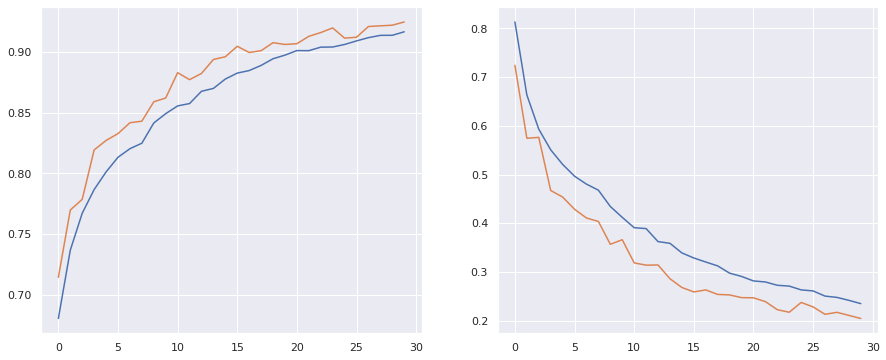

In [88]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.plot(conv_lstm_history.history['accuracy'])
plt.plot(conv_lstm_history.history['val_accuracy'])
plt.subplot(1,2,2)
plt.plot(conv_lstm_history.history['loss'])
plt.plot(conv_lstm_history.history['val_loss'])
plt.show()

In [89]:
ypred = conv_lstm.predict(xtest2)
ytemp = []
for i in ypred:
    pred = [0]*(ytrain2.shape[1])
    pred[np.argmax(i)] = 1
    ytemp.append(pred)
ypred = np.array(ytemp)

269/269 [==============================] - 3s 6ms/step


In [90]:
# Testing accuracy

cnt = 0
for i in range(len(ypred)):
    if (ypred[i] == ytest2[i]).all() : cnt += 1
        
print('test accuracy = ',cnt / len(ypred) * 100)

test accuracy =  92.00605073306959


In [91]:
test_cm = confusion_matrix(ytest2.argmax(axis = 1),ypred.argmax(axis = 1))

In [92]:
accuracy_per_class = np.diag(test_cm) / np.sum(test_cm, axis=1)

print("Accuracy per class:", accuracy_per_class)

Accuracy per class: [0.94832894 0.88763494 0.88077336 0.89600743]


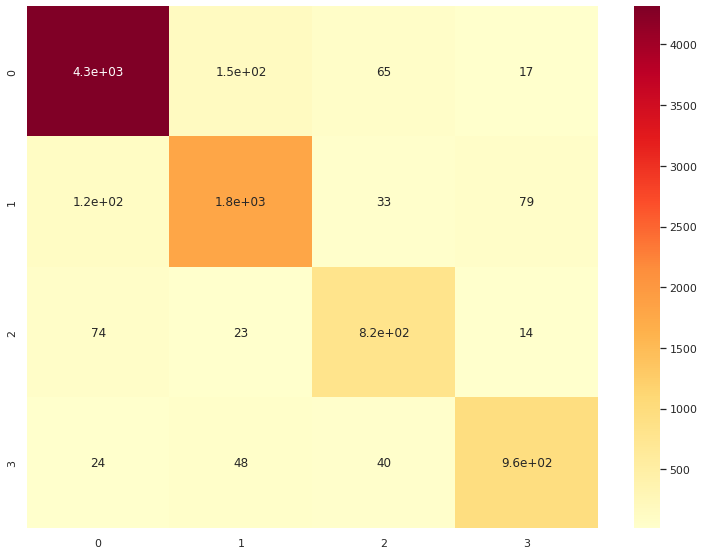

In [93]:
sb.set(rc = {'figure.figsize':(12.8,9.6)})
sb.heatmap(test_cm,annot = True, cmap = 'YlOrRd')

In [94]:
print(sklearn.metrics.classification_report(ytest2.argmax(axis = 1),ypred.argmax(axis = 1)))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4548
           1       0.89      0.89      0.89      2038
           2       0.86      0.88      0.87       931
           3       0.90      0.90      0.90      1077

    accuracy                           0.92      8594
   macro avg       0.90      0.90      0.90      8594
weighted avg       0.92      0.92      0.92      8594



In [95]:
cnt = np.zeros(len(tasks))
cnt_t = np.zeros(len(tasks))

for i in range (len(ypred)):
    for j in range(len(tasks)):
        if ztest2[i]==tasks[j]:
            cnt_t[j] += 1
            if (ypred[i] == ytest2[i]).all():
                cnt[j] +=1

for j in range(len(tasks)):
    c = cnt[j]/cnt_t[j]*100
    print("for task " + str(tasks[j]) + " the accuracy is: " + str(c))
            

for task 20 the accuracy is: 90.52287581699346
for task 21 the accuracy is: 59.45945945945946
for task 22 the accuracy is: 90.70631970260223
for task 23 the accuracy is: 88.88888888888889
for task 24 the accuracy is: 86.79245283018868
for task 25 the accuracy is: 95.7957957957958
for task 26 the accuracy is: 92.22972972972973
for task 27 the accuracy is: 100.0
for task 28 the accuracy is: 89.04109589041096
for task 29 the accuracy is: 94.6360153256705
for task 30 the accuracy is: 82.18181818181817
for task 31 the accuracy is: 90.6614785992218
for task 32 the accuracy is: 82.5278810408922
for task 33 the accuracy is: 88.25910931174089
for task 34 the accuracy is: 91.12903225806451
